# A Full Blow Consumption Model

1. Go through the **ConsumptionSaving.pdf** slides
2. This notebooks solves the presented model with **vfi** and **egm**
3. All the results from the slides are produced here

# Setup

In [14]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from ConsumptionSavingModel import ConsumptionSavingModelClass

# VFI

In [16]:
model_vfi = ConsumptionSavingModelClass(name='test',par={'solmethod':'vfi'})
print(model_vfi)

Modelclass: ConsumptionSavingModelClass
Name: test

namespaces: ['sol', 'par', 'sim']
other_attrs: []
savefolder: saved
not_floats: ['solmethod', 'T', 'TR', 'age_min', 'Nxi', 'Npsi', 'Nm', 'Na', 'simT', 'simN', 'simlifecycle', 'Nshocks', 'do_cev']

sol:
 m = ndarray with shape = (200, 100) [dtype: float64]
 c = ndarray with shape = (200, 100) [dtype: float64]
 inv_v = ndarray with shape = (200, 100) [dtype: float64]
 memory, gb: 0.0

par:
 solmethod = vfi [str]
 T = 200 [int]
 TR = 200 [int]
 age_min = 25 [int]
 rho = 2.0 [float]
 beta = 0.96 [float]
 G = 1.02 [float]
 sigma_xi = 0.1 [float]
 sigma_psi = 0.1 [float]
 pi = 0.005 [float]
 mu = 0.0 [float]
 L = ndarray with shape = (200,) [dtype: float64]
 R = 1.04 [float]
 borrowingfac = 0.0 [float]
 cev = 0.0 [float]
 do_cev = 0 [int]
 a_max = 20.0 [float]
 a_phi = 1.1 [float]
 m_max = 20.0 [float]
 m_phi = 1.1 [float]
 Nxi = 8 [int]
 Npsi = 8 [int]
 Na = 500 [int]
 Nm = 100 [int]
 sim_mini = 2.5 [float]
 simN = 100000 [int]
 simT = 100

In [17]:
model_vfi.solve()
model_vfi.simulate()

model solved in 52.4 secs
model simulated in 3.6 secs


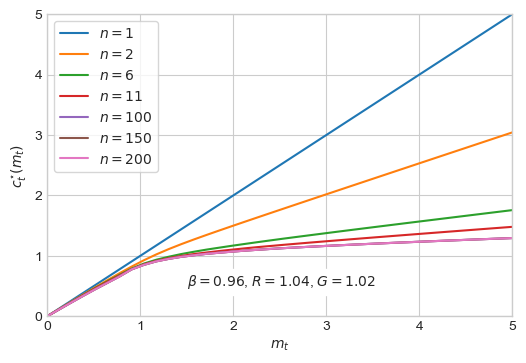

In [18]:
model_vfi.plot_consumption_function_convergence()

# EGM

In [19]:
model_egm = ConsumptionSavingModelClass(name='test',par={'solmethod':'egm'})
print(model_vfi)

Modelclass: ConsumptionSavingModelClass
Name: test

namespaces: ['sol', 'par', 'sim']
other_attrs: []
savefolder: saved
not_floats: ['solmethod', 'T', 'TR', 'age_min', 'Nxi', 'Npsi', 'Nm', 'Na', 'simT', 'simN', 'simlifecycle', 'Nshocks', 'do_cev']

sol:
 m = ndarray with shape = (200, 100) [dtype: float64]
 c = ndarray with shape = (200, 100) [dtype: float64]
 inv_v = ndarray with shape = (200, 100) [dtype: float64]
 memory, gb: 0.0

par:
 solmethod = vfi [str]
 T = 200 [int]
 TR = 200 [int]
 age_min = 25 [int]
 rho = 2.0 [float]
 beta = 0.96 [float]
 G = 1.02 [float]
 sigma_xi = 0.1 [float]
 sigma_psi = 0.1 [float]
 pi = 0.005 [float]
 mu = 0.0 [float]
 L = ndarray with shape = (200,) [dtype: float64]
 R = 1.04 [float]
 borrowingfac = 0.0 [float]
 cev = 0.0 [float]
 do_cev = 0 [int]
 a_max = 20.0 [float]
 a_phi = 1.1 [float]
 m_max = 20.0 [float]
 m_phi = 1.1 [float]
 Nxi = 8 [int]
 Npsi = 8 [int]
 Na = 500 [int]
 Nm = 100 [int]
 sim_mini = 2.5 [float]
 simN = 100000 [int]
 simT = 100

In [20]:
model_egm.solve()
model_egm.simulate()

model solved in 3.0 secs
model simulated in 3.7 secs


# Compare

**Consumption Functions:**

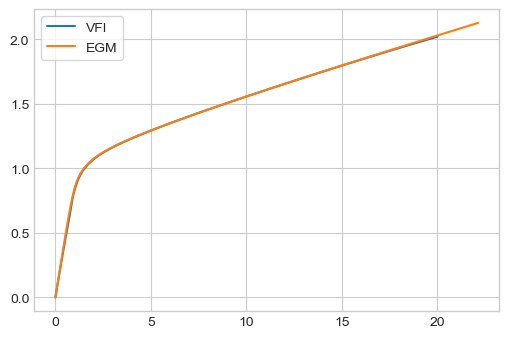

In [21]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)

ax.plot(model_vfi.sol.m[0],model_vfi.sol.c[0],label='VFI')
ax.plot(model_egm.sol.m[0],model_egm.sol.c[0],'-',label='EGM')

ax.legend(frameon=True)

**Distributions:**

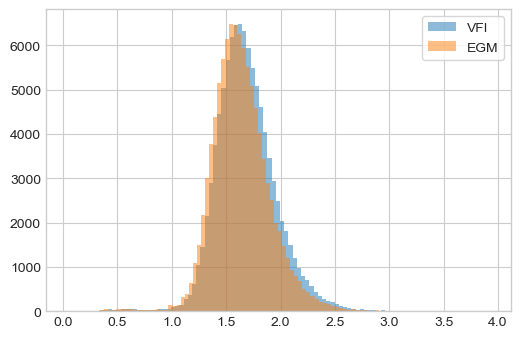

In [22]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)

ax.hist(model_vfi.sim.m[:,-1],alpha=0.50,label='VFI',bins=100)
ax.hist(model_egm.sim.m[:,-1],alpha=0.50,label='EGM',bins=100)

ax.legend(frameon=True)

# Results from slides

**What to do?**

In [23]:
BASELINE = True
DO_PERFECT_FORESIGHT = BASELINE
DO_BUFFER_STOCK = BASELINE
DO_LIFE_CYCLE = BASELINE

## Perfect forsight

pf_con_baseline
model solved in 3.0 secs
model simulated in 2.4 secs
MPC for m->inf: 0.040


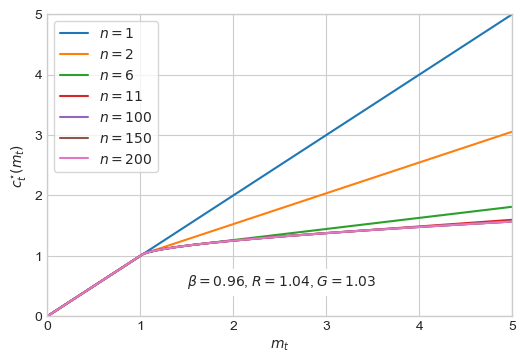

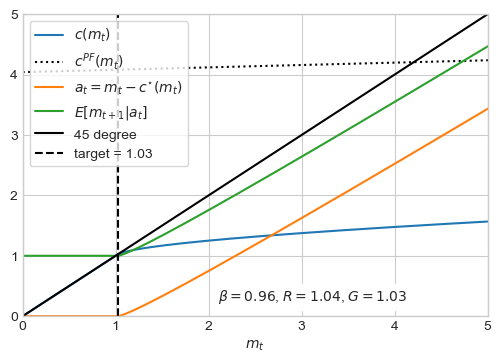

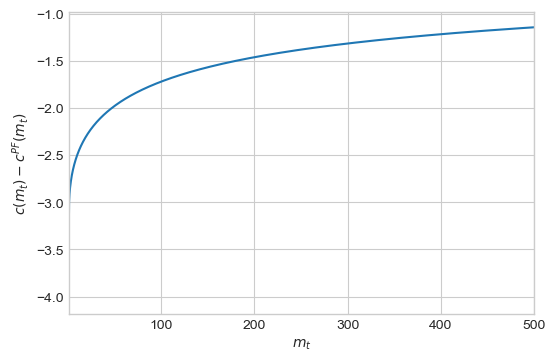

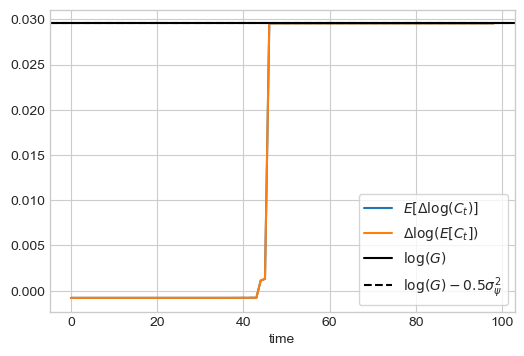

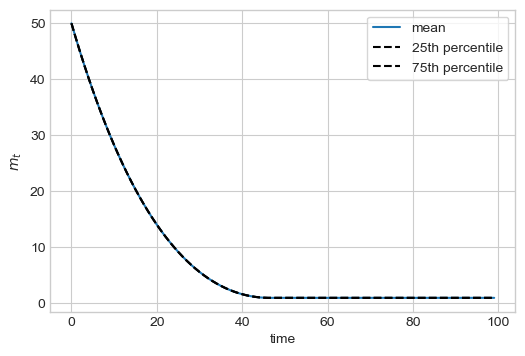


pf_con_notGI_FHW_RIC
model solved in 0.2 secs
model simulated in 0.0 secs
MPC for m->inf: 0.025


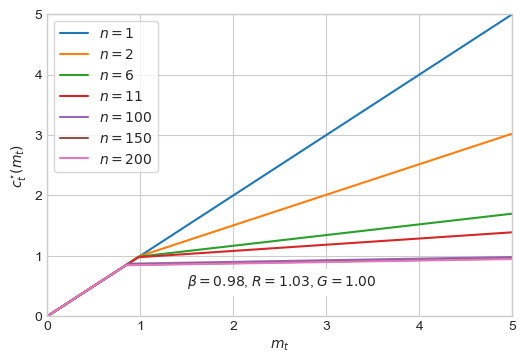

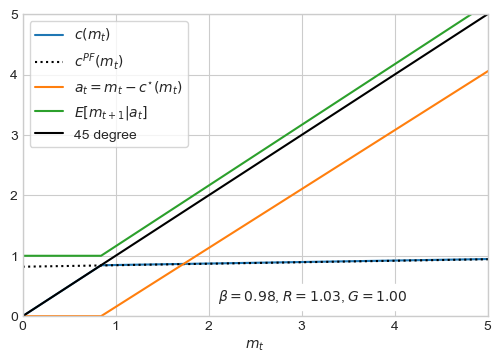

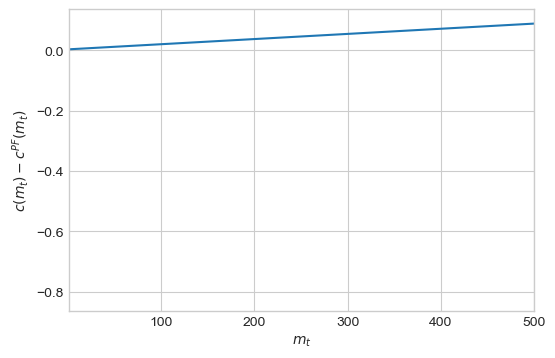

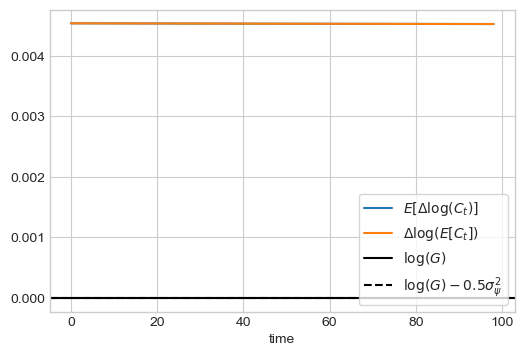

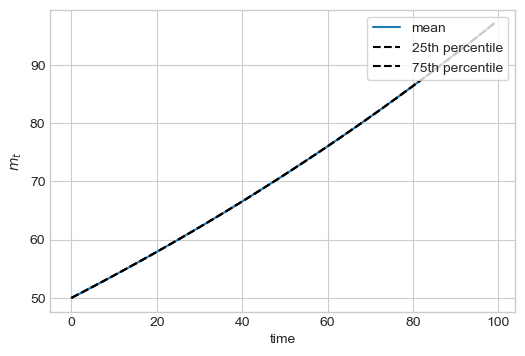


pf_con_GI_notFHW_RIC
model solved in 0.2 secs
model simulated in 0.0 secs
MPC for m->inf: 0.042


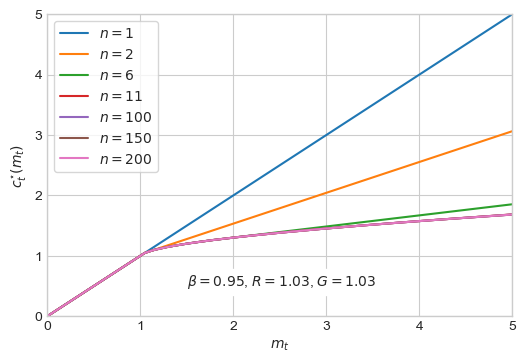

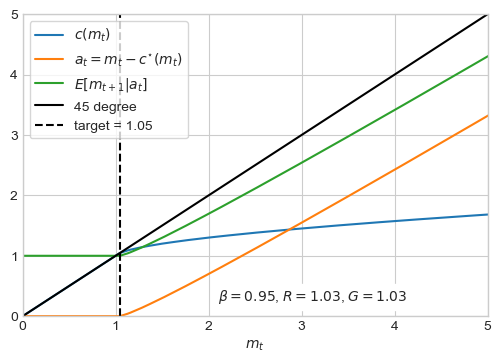

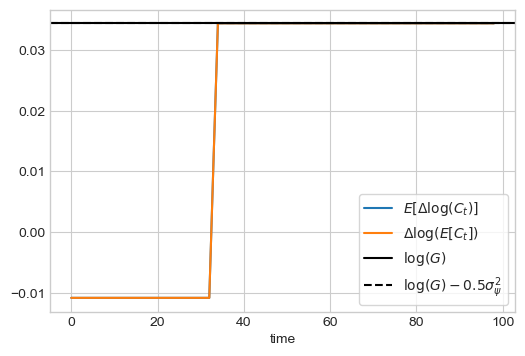

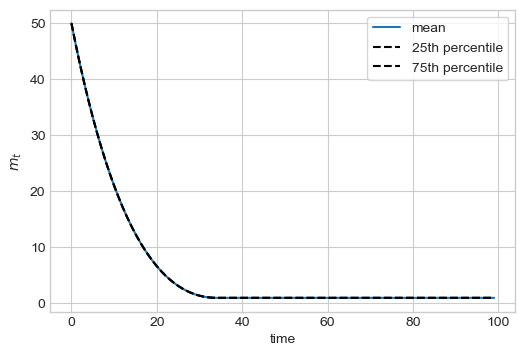


pf_con_GI_notFHW_notRIC
model solved in 0.2 secs
model simulated in 0.0 secs
MPC for m->inf: 0.015


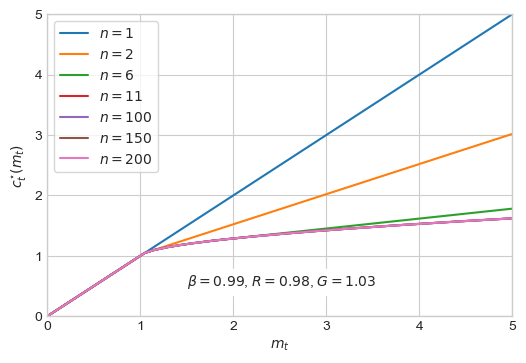

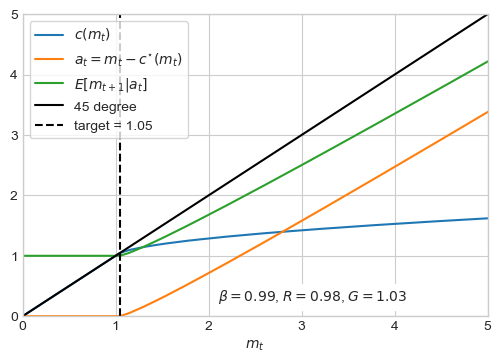

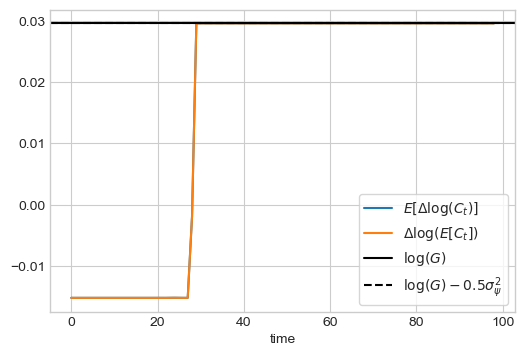

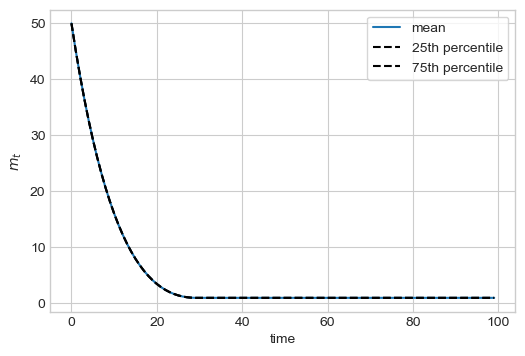

In [24]:
names = ['pf_con_baseline','pf_con_notGI_FHW_RIC','pf_con_GI_notFHW_RIC','pf_con_GI_notFHW_notRIC'] 

if DO_PERFECT_FORESIGHT:
    
    model = ConsumptionSavingModelClass(name='')
    for i,name in enumerate(names):

        print(name)

        # a. setup and solve
        model.name = name
        par = model.par

        # detailed solution
        par.T = 200
        par.Na = 10000
        par.a_max = 500
        par.a_phi = 1.1

        # no uncertainty
        par.sigma_xi = 0
        par.sigma_psi = 0
        par.pi = 0 
        par.Npsi = 1
        par.Nxi = 1

        # no borrowing
        par.borrowingfac = 0

        # simulation settings
        par.simN = 1
        par.sim_mini = 50

        # b. changing parameters
        if name == 'pf_con_baseline':
            par.G = 1.03
            par.R = 1.04
            par.beta = 0.96     
        elif name == 'pf_con_notGI_FHW_RIC':
            par.G = 1.00
            par.R = 1.03
            par.beta = 0.98          
        elif name == 'pf_con_GI_notFHW_RIC':
            par.G = 1.035
            par.R = 1.03
            par.beta = 0.95                  
        elif name == 'pf_con_GI_notFHW_notRIC':
            par.R = 0.98
            par.G = 1.03
            par.beta = 0.99 

        # c. solve and simulate
        model.allocate()
        model.solve()                
        model.simulate()

        # d. figures
        model.plot_consumption_function_convergence()
        model.plot_buffer_stock_target()
        if par.FHW < 1 and par.RI < 1:
            model.plot_consumption_function_pf()
        model.plot_simulate_consumption_growth()    

        # e. MPC
        MPC = np.diff(model.sol.c[0,:])/np.diff(model.sol.m[0,:])
        print(f'MPC for m->inf: {MPC[-1]:.3f}')
        
        plt.show()
        print('')

## Buffer-stock

baseline
model solved in 3.9 secs
model simulated in 3.7 secs
MPC for m->inf: 0.040


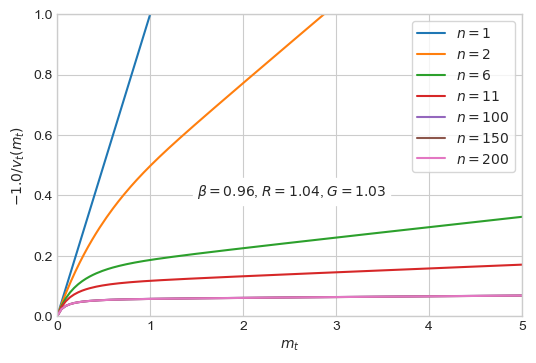

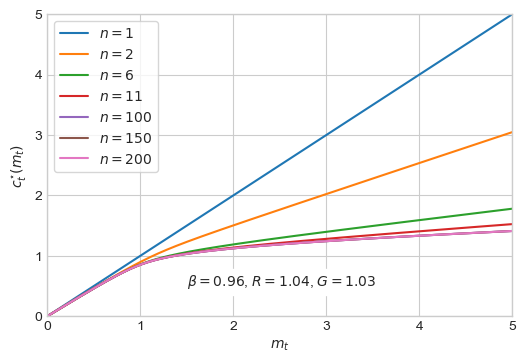

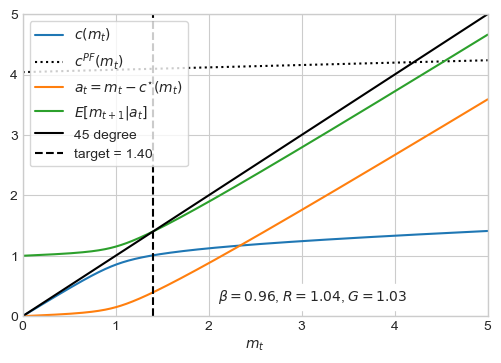

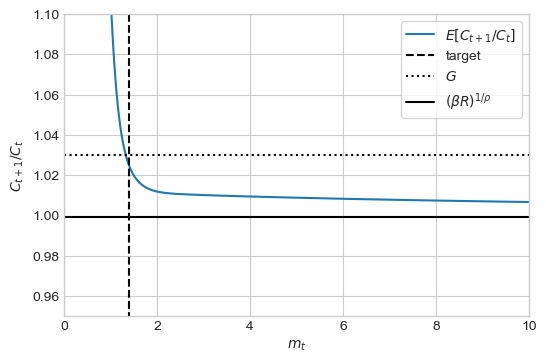

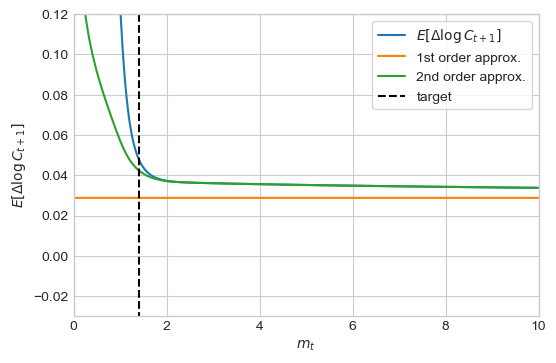

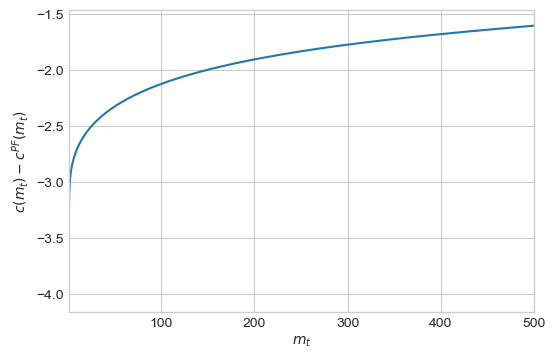

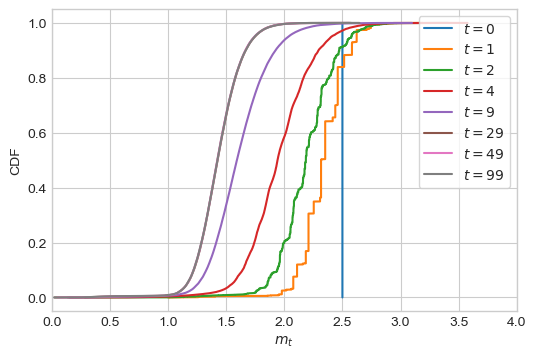

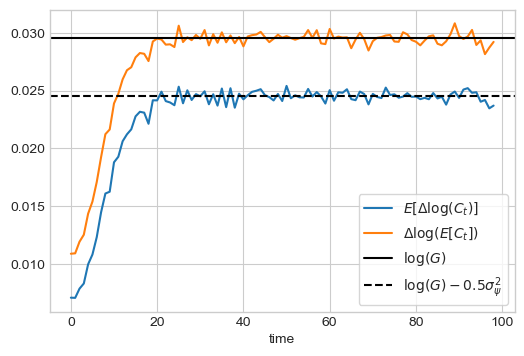

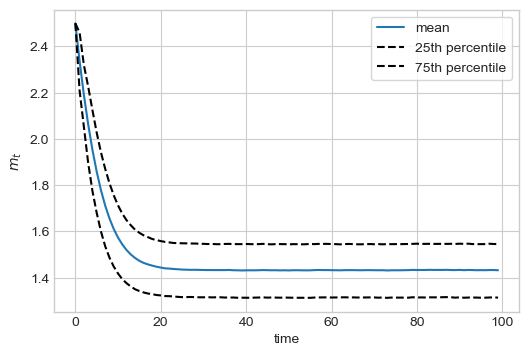


RI_notGI_FHW
model solved in 1.1 secs
model simulated in 1.3 secs
MPC for m->inf: 0.040


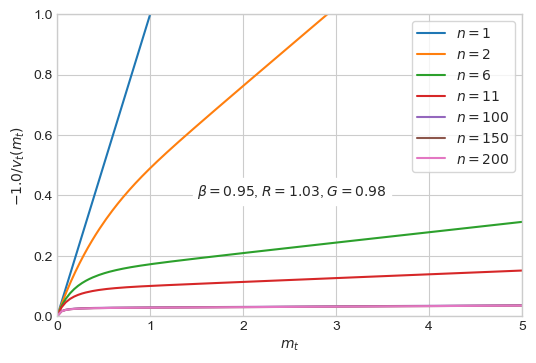

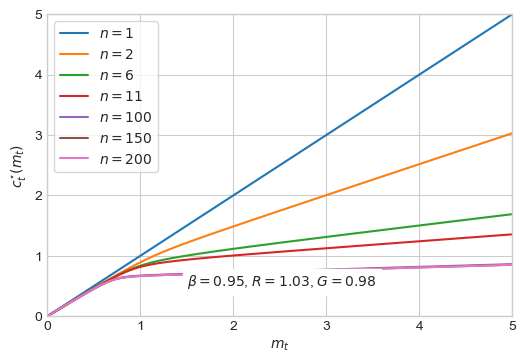

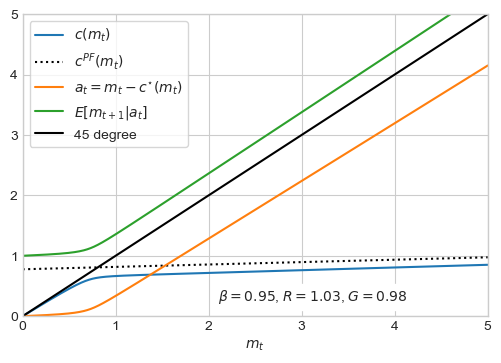

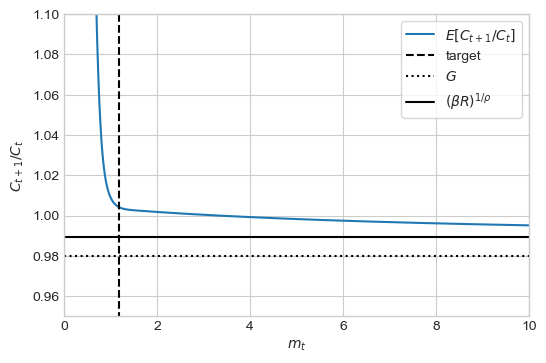

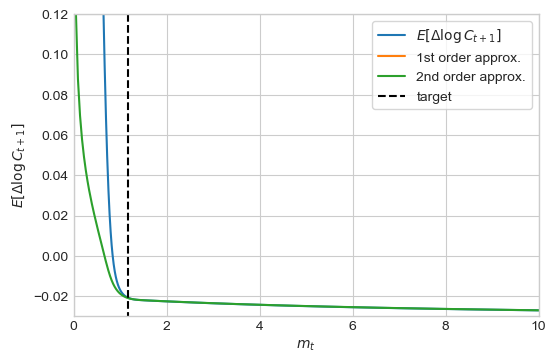

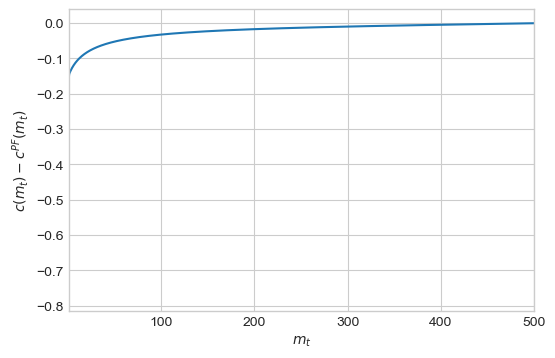

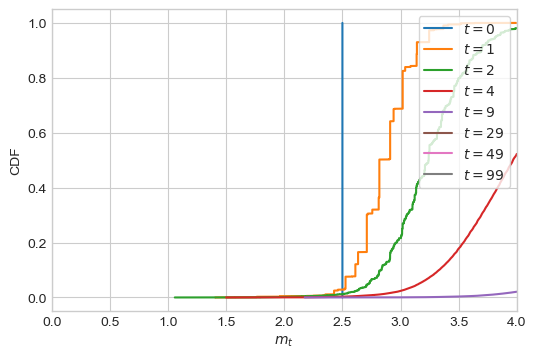

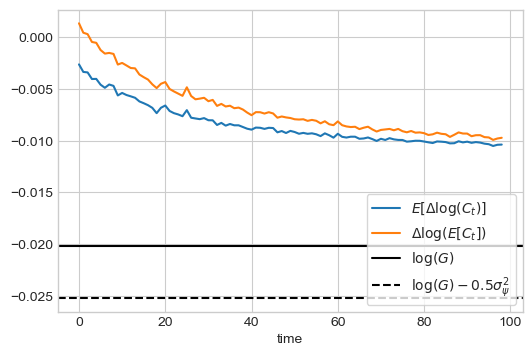

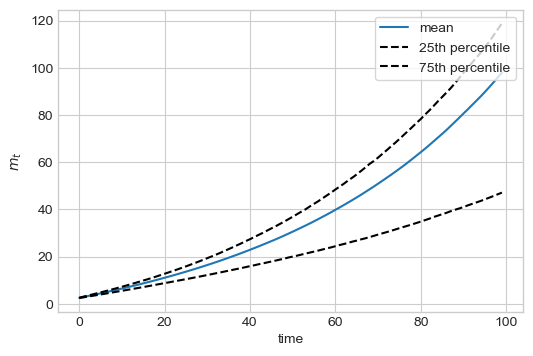


RI_GI_notFHW
model solved in 1.1 secs
model simulated in 1.3 secs
MPC for m->inf: 0.037


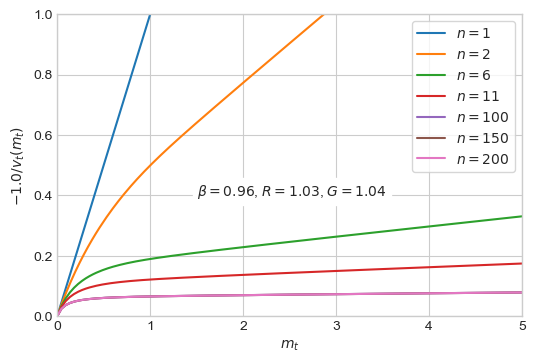

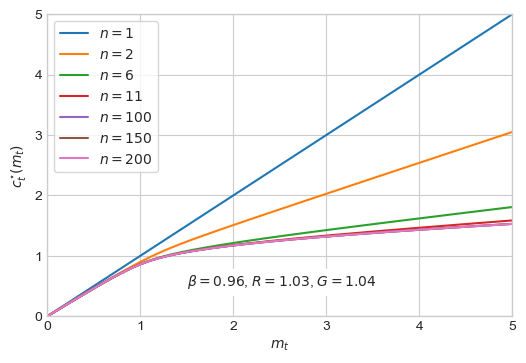

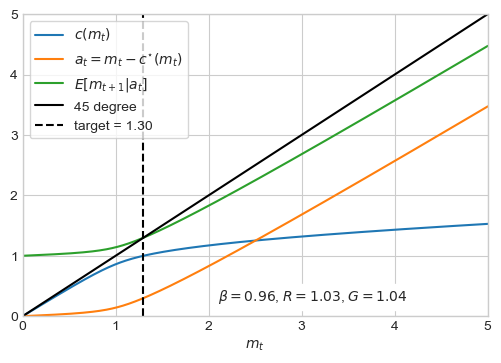

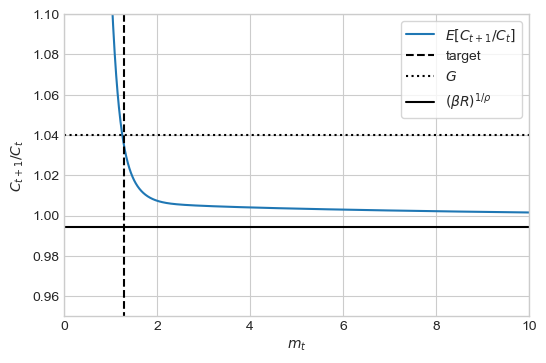

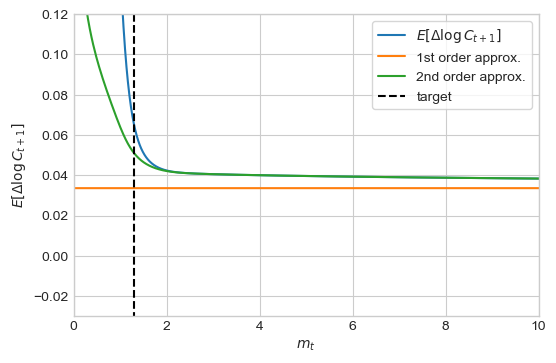

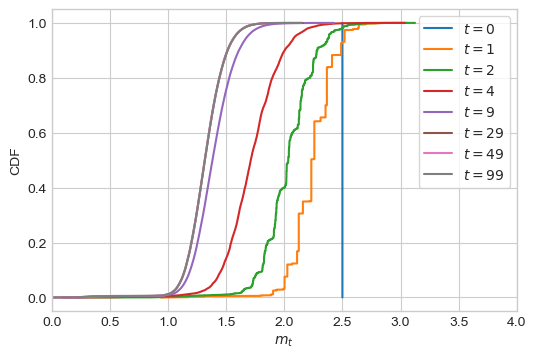

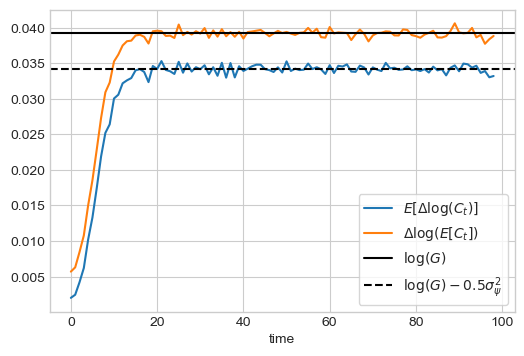

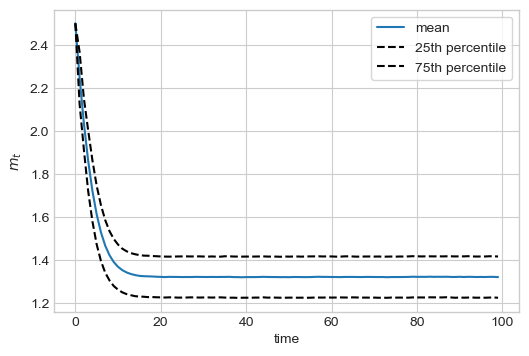


notRI_GI_notFHW
model solved in 1.1 secs
model simulated in 1.3 secs
MPC for m->inf: 0.007


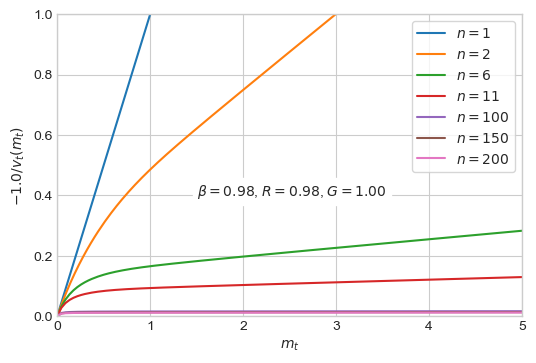

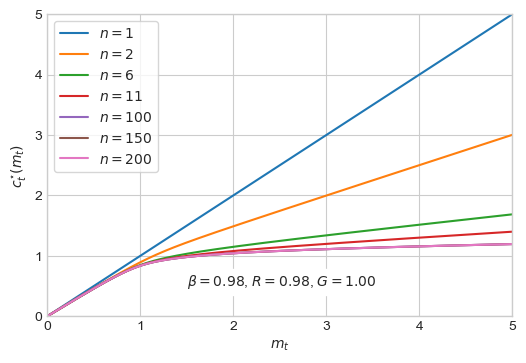

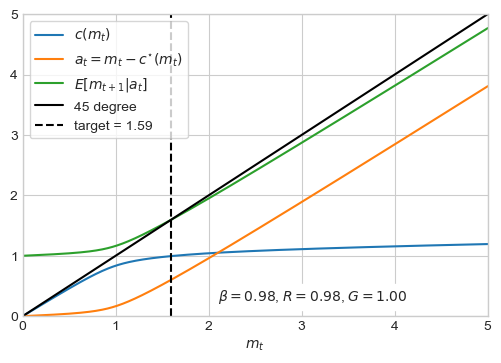

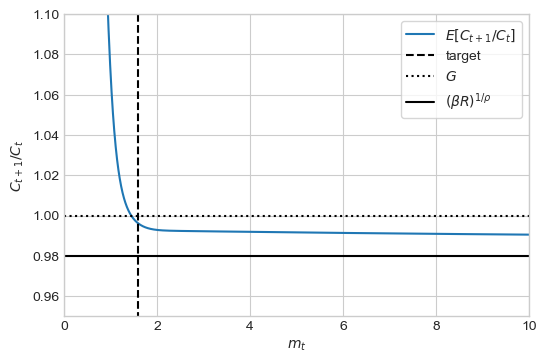

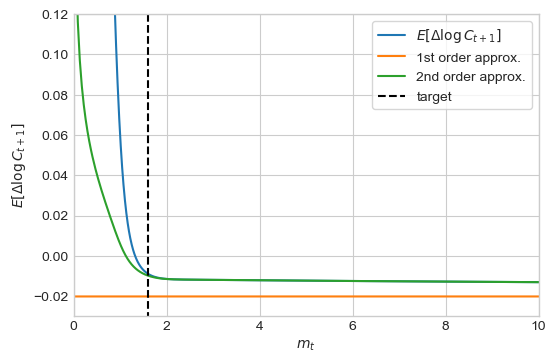

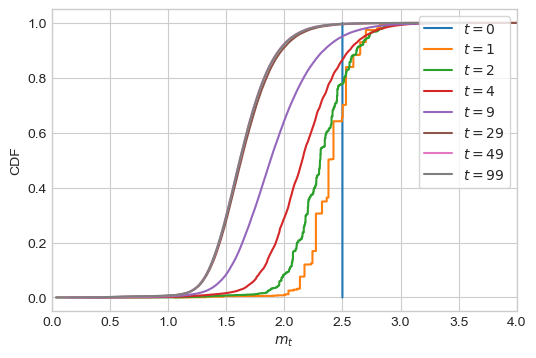

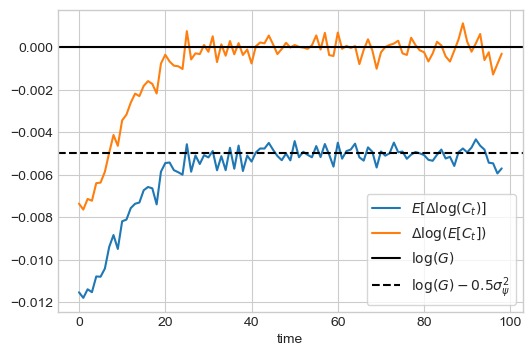

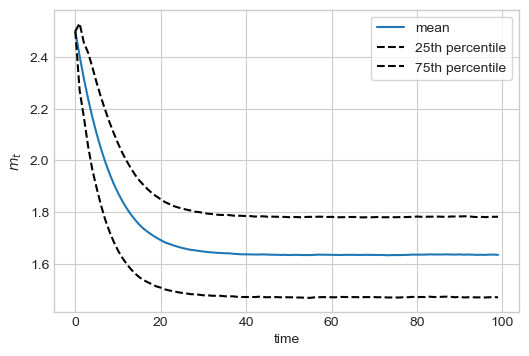


highrisk
model solved in 1.0 secs
model simulated in 1.3 secs
MPC for m->inf: 0.040


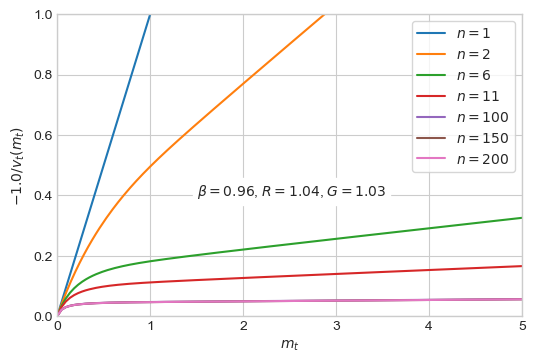

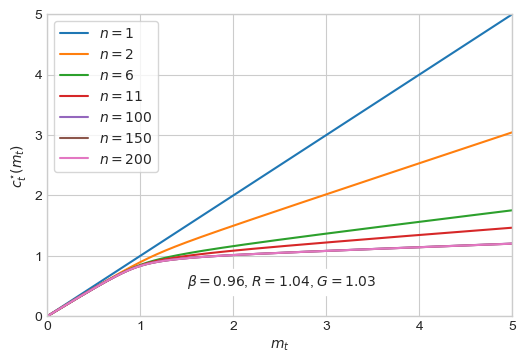

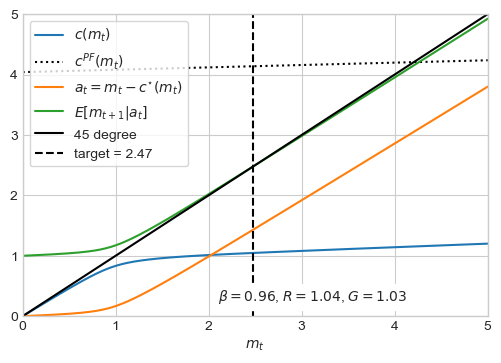

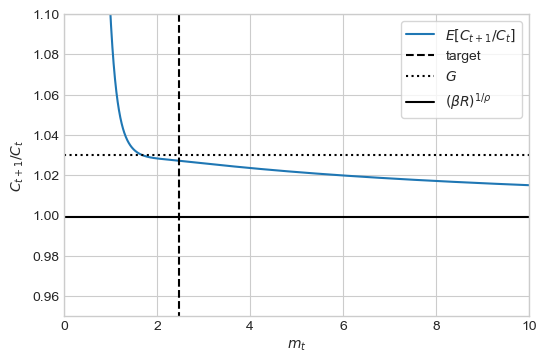

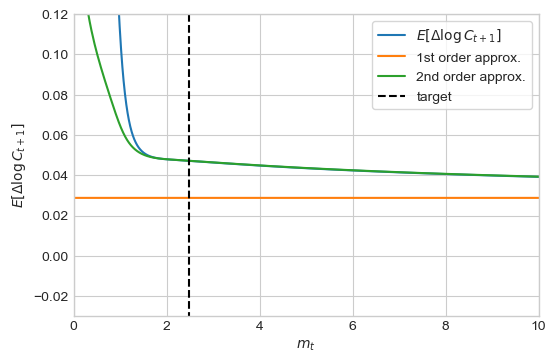

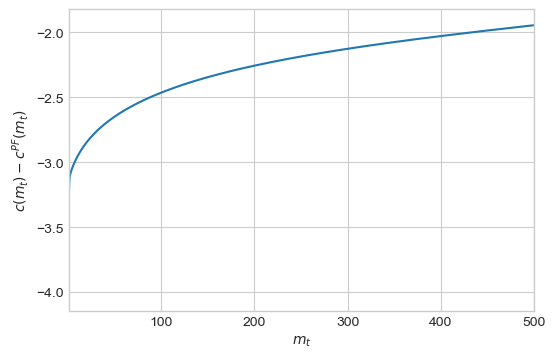

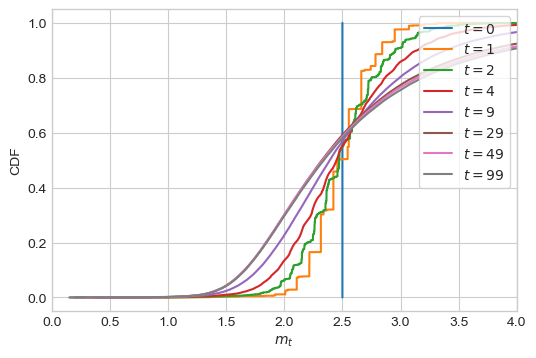

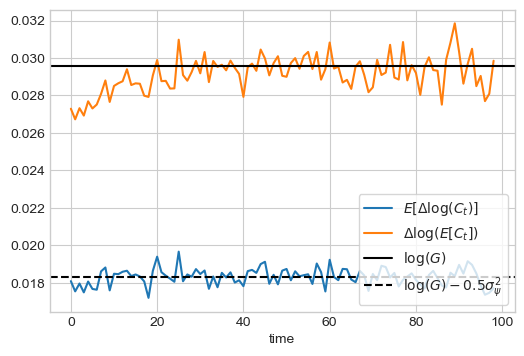

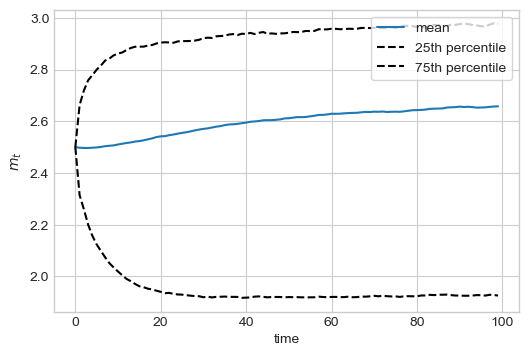

In [25]:
names = ['baseline','RI_notGI_FHW','RI_GI_notFHW','notRI_GI_notFHW','highrisk']

if DO_BUFFER_STOCK:
    
    model = ConsumptionSavingModelClass(name='')    
    par = model.par
    for i,name in enumerate(names):

        print(name)

        # a. setup and solve    
        model.name = name

        # detailed solution
        par.T = 200
        par.Na = 10000
        par.a_max = 500
        par.a_phi = 1.3

        # b. changing parameters
        if name in ['baseline','highrisk']:
            par.G = 1.03
            par.R = 1.04
            par.beta = 0.96
            if name == 'highrisk':
                par.sigma_psi = 0.15
        elif name == 'RI_notGI_FHW':
            par.G = 0.98
            par.R = 1.03
            par.beta = 0.95
        elif name == 'RI_GI_notFHW':
            par.G = 1.04
            par.R = 1.03
            par.beta = 0.96
        elif name == 'notRI_GI_notFHW':
            par.G = 1.00
            par.R = 0.98
            par.beta = 0.98           

        # c. solve and simulate
        model.allocate()
        model.solve()
        model.simulate()

        # d. numbers and figures
        model.plot_value_function_convergence()
        model.plot_consumption_function_convergence()    
        model.plot_buffer_stock_target()
        if par.FHW < 1 and par.RI < 1:
            model.plot_consumption_function_pf()    
        model.plot_simulate_cdf_cash_on_hand()
        model.plot_simulate_consumption_growth()    

        # e. MPC
        MPC = np.diff(model.sol.c[0,:])/np.diff(model.sol.m[0,:])
        print(f'MPC for m->inf: {MPC[-1]:.3f}')
        
        plt.show()
        print('')        

## Life-Cycle

model solved in 3.1 secs
model simulated in 2.9 secs


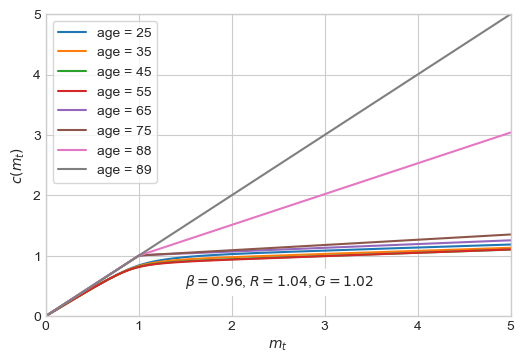

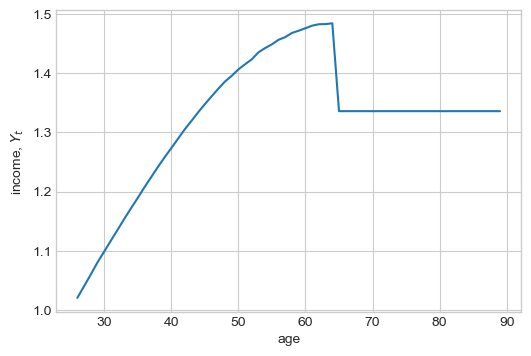

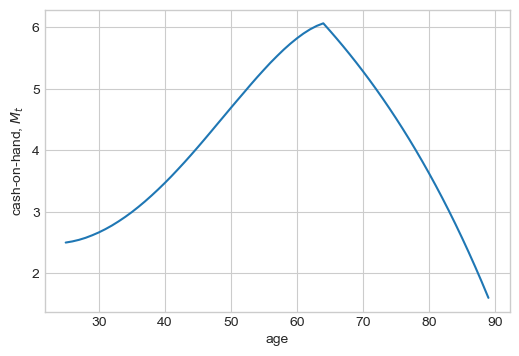

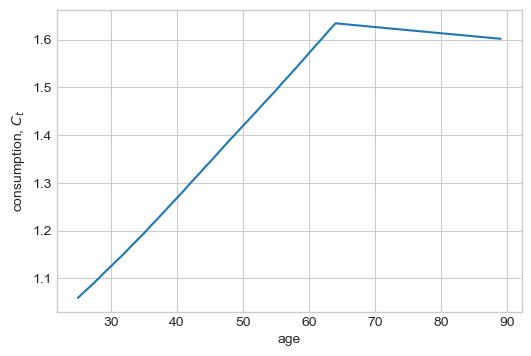

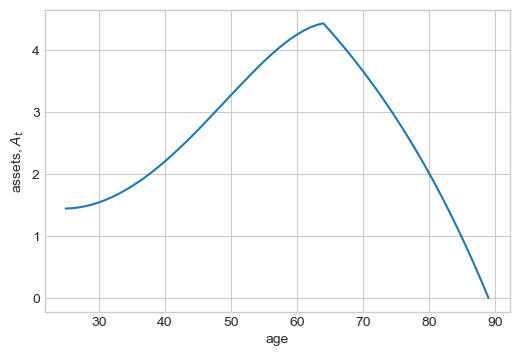

In [26]:
if DO_LIFE_CYCLE:
    
    model = ConsumptionSavingModelClass(name='lifecycle') 
    par = model.par

    # a. life-cycle settings
    par.T = 90-par.age_min;
    par.TR = 65-par.age_min;
    par.simT = par.T;
    par.simlifecycle = 1;

    # b. income profile
    par.L[:par.TR] = np.linspace(1,1/(par.G),par.TR)
    par.L[par.TR-1] = 0.90
    par.L[par.TR-1:] = par.L[par.TR-1:]/par.G

    # c. solve and simulate
    model.allocate()
    model.solve()
    model.simulate()

    # d. figures
    model.plot_consumption_function_convergence_age()
    model.plot_life_cycle_income()
    model.plot_life_cycle_cashonhand()
    model.plot_life_cycle_consumption()
    model.plot_life_cycle_assets()